In [127]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [128]:
stock_data = pd.read_json("Desktop/LINKUSDT_1d 2.json")
stock_data

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,delete
0,1547596800000,0.5355,0.5355,0.4668,0.4895,1343660.31,1547683199999,6.650136e+05,3492,602419.92,3.001164e+05,0
1,1547683200000,0.4895,0.4953,0.4639,0.4756,1411725.35,1547769599999,6.734472e+05,3987,778386.36,3.708751e+05,0
2,1547769600000,0.4762,0.5112,0.4601,0.4894,984417.59,1547855999999,4.749993e+05,5662,463067.14,2.234760e+05,0
3,1547856000000,0.4908,0.5000,0.4673,0.4831,735443.20,1547942399999,3.540900e+05,4482,335579.52,1.621085e+05,0
4,1547942400000,0.4803,0.4920,0.4590,0.4834,677499.56,1548028799999,3.233336e+05,2098,315527.36,1.507622e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2112,1730073600000,10.9900,11.2700,10.7100,11.1800,2232645.81,1730159999999,2.452865e+07,140222,1067166.98,1.173026e+07,0
2113,1730160000000,11.1900,11.8100,11.1500,11.8000,2413413.41,1730246399999,2.781243e+07,141198,1179830.64,1.359220e+07,0
2114,1730246400000,11.8000,12.4500,11.6500,12.3900,3115047.04,1730332799999,3.767751e+07,179362,1691645.36,2.046836e+07,0
2115,1730332800000,12.4000,12.4700,11.3100,11.4100,2672404.77,1730419199999,3.185358e+07,165377,1260534.45,1.503742e+07,0


In [129]:
stock_data["Date"] = pd.to_datetime(stock_data["open time"],unit='ms')
stock_data.index = stock_data["Date"]
# stock_data.index = pd.DatetimeIndex(stock_data.index).to_period('D')
stock_data

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,delete,Date
Date,,,,,,,,,,,,,
2019-01-16,1547596800000,0.5355,0.5355,0.4668,0.4895,1343660.31,1547683199999,6.650136e+05,3492,602419.92,3.001164e+05,0,2019-01-16
2019-01-17,1547683200000,0.4895,0.4953,0.4639,0.4756,1411725.35,1547769599999,6.734472e+05,3987,778386.36,3.708751e+05,0,2019-01-17
2019-01-18,1547769600000,0.4762,0.5112,0.4601,0.4894,984417.59,1547855999999,4.749993e+05,5662,463067.14,2.234760e+05,0,2019-01-18
2019-01-19,1547856000000,0.4908,0.5000,0.4673,0.4831,735443.20,1547942399999,3.540900e+05,4482,335579.52,1.621085e+05,0,2019-01-19
2019-01-20,1547942400000,0.4803,0.4920,0.4590,0.4834,677499.56,1548028799999,3.233336e+05,2098,315527.36,1.507622e+05,0,2019-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,1730073600000,10.9900,11.2700,10.7100,11.1800,2232645.81,1730159999999,2.452865e+07,140222,1067166.98,1.173026e+07,0,2024-10-28
2024-10-29,1730160000000,11.1900,11.8100,11.1500,11.8000,2413413.41,1730246399999,2.781243e+07,141198,1179830.64,1.359220e+07,0,2024-10-29
2024-10-30,1730246400000,11.8000,12.4500,11.6500,12.3900,3115047.04,1730332799999,3.767751e+07,179362,1691645.36,2.046836e+07,0,2024-10-30


In [130]:
stock_data.drop(columns=['open time', 'close time', 'delete', 'Date'], inplace=True)
stock_data

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
Date,,,,,,,,,
2019-01-16,0.5355,0.5355,0.4668,0.4895,1343660.31,6.650136e+05,3492,602419.92,3.001164e+05
2019-01-17,0.4895,0.4953,0.4639,0.4756,1411725.35,6.734472e+05,3987,778386.36,3.708751e+05
2019-01-18,0.4762,0.5112,0.4601,0.4894,984417.59,4.749993e+05,5662,463067.14,2.234760e+05
2019-01-19,0.4908,0.5000,0.4673,0.4831,735443.20,3.540900e+05,4482,335579.52,1.621085e+05
2019-01-20,0.4803,0.4920,0.4590,0.4834,677499.56,3.233336e+05,2098,315527.36,1.507622e+05
...,...,...,...,...,...,...,...,...,...
2024-10-28,10.9900,11.2700,10.7100,11.1800,2232645.81,2.452865e+07,140222,1067166.98,1.173026e+07
2024-10-29,11.1900,11.8100,11.1500,11.8000,2413413.41,2.781243e+07,141198,1179830.64,1.359220e+07
2024-10-30,11.8000,12.4500,11.6500,12.3900,3115047.04,3.767751e+07,179362,1691645.36,2.046836e+07


In [131]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [132]:
stock_data.head()

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
Date,,,,,,,,,
2019-01-16,0.5355,0.5355,0.4668,0.4895,1343660.31,665013.644449,3492,602419.92,300116.387012
2019-01-17,0.4895,0.4953,0.4639,0.4756,1411725.35,673447.208597,3987,778386.36,370875.085453
2019-01-18,0.4762,0.5112,0.4601,0.4894,984417.59,474999.286242,5662,463067.14,223476.046492
2019-01-19,0.4908,0.5000,0.4673,0.4831,735443.20,354090.041046,4482,335579.52,162108.450317
2019-01-20,0.4803,0.4920,0.4590,0.4834,677499.56,323333.553838,2098,315527.36,150762.229982


In [133]:
stock_data.drop(['open','DATE_FROM','high',
                    'low','volume','quote asset volume',
                    'number of trades','taker buy base asset volume','taker buy quote asset volume'], axis = 1, inplace = True, errors = 'ignore')
stock_data.head()

,close
Date,
2019-01-16,0.4895
2019-01-17,0.4756
2019-01-18,0.4894
2019-01-19,0.4831
2019-01-20,0.4834


In [134]:
stock_data['ds'] = stock_data.index
stock_data.head()

,close,ds
Date,,
2019-01-16,0.4895,2019-01-16
2019-01-17,0.4756,2019-01-17
2019-01-18,0.4894,2019-01-18
2019-01-19,0.4831,2019-01-19
2019-01-20,0.4834,2019-01-20


In [135]:
stock_data['y'] =stock_data.close	

yy=stock_data[['ds','close']].tail(16)

yy

,ds,close
Date,,
2024-10-17,2024-10-17,11.03
2024-10-18,2024-10-18,11.48
2024-10-19,2024-10-19,11.42
2024-10-20,2024-10-20,11.98
2024-10-21,2024-10-21,11.71
2024-10-22,2024-10-22,11.97
2024-10-23,2024-10-23,11.32
2024-10-24,2024-10-24,11.62
2024-10-25,2024-10-25,11.13


In [136]:
m = Prophet()

In [137]:

m.fit(stock_data)

17:53:04 - cmdstanpy - INFO - Chain [1] start processing
17:53:04 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2477,2025-10-28
2478,2025-10-29
2479,2025-10-30
2480,2025-10-31
2481,2025-11-01


In [139]:
forecast = m.predict(future)

In [140]:

forecast[['ds' ,'yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2477,2025-10-28,20.844437,8.634462,34.359444
2478,2025-10-29,21.062444,8.606889,34.018142
2479,2025-10-30,21.184054,9.174370,34.315845
2480,2025-10-31,21.372695,8.719690,34.805199
2481,2025-11-01,21.565560,9.108542,35.541797


In [141]:
a = forecast[(forecast.ds >= '2020-01-16') & (forecast.ds < '2024-11-10')]

a[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2095,2024-10-11,13.712168,9.708798,17.499436
2096,2024-10-12,13.798956,10.006809,17.782484
2097,2024-10-13,13.913961,10.007978,18.249783
2098,2024-10-14,13.948910,10.037610,18.087860
2099,2024-10-15,14.002859,10.082355,17.436675
2100,2024-10-16,14.148269,10.178566,18.098931
2101,2024-10-17,14.215136,10.598177,18.194555
2102,2024-10-18,14.367718,10.693664,18.360312
2103,2024-10-19,14.543697,10.581328,18.287240
2104,2024-10-20,14.745208,10.526117,18.748950


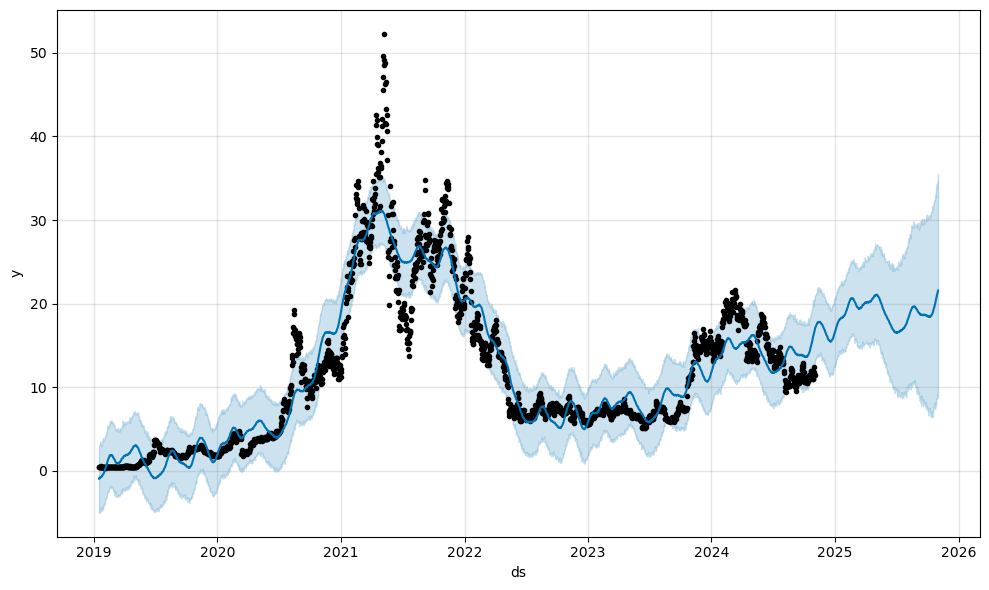

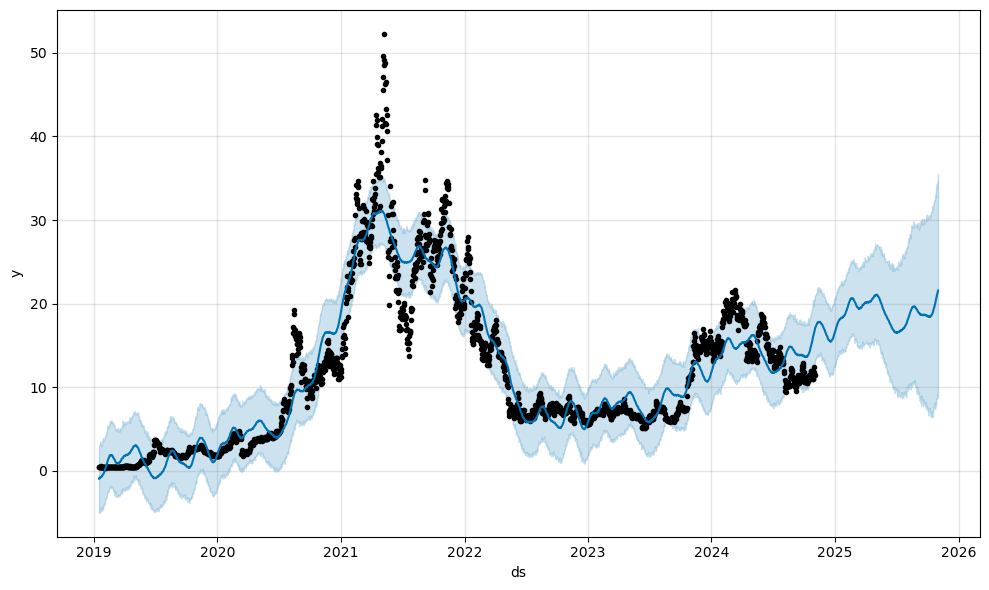

In [142]:
m.plot(forecast)

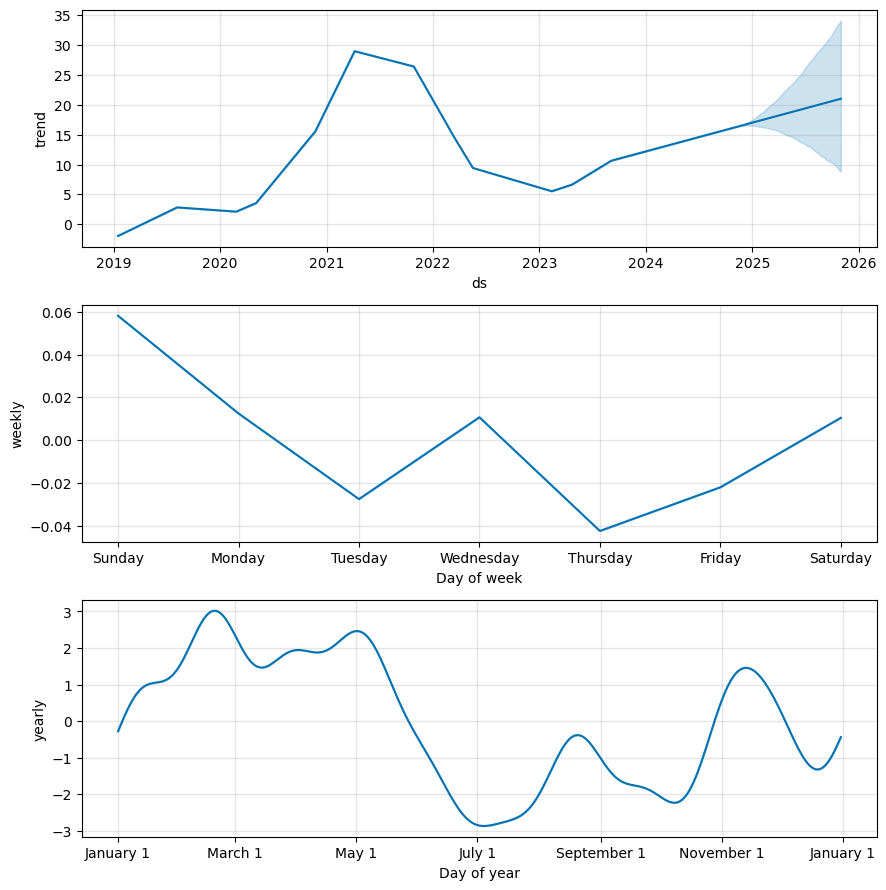

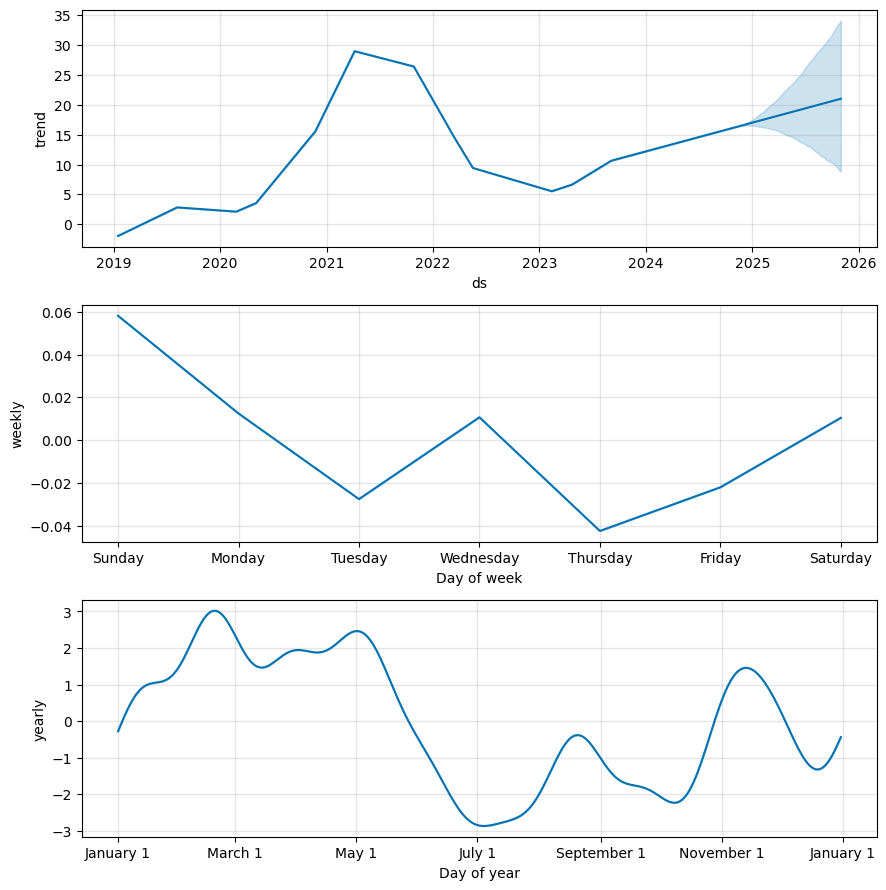

In [143]:
m.plot_components(forecast)